In [ ]:
!pip install transformers
!pip install scikit-learn-extra

import nltk
nltk.download('stopwords')

In [12]:
from clustering import*
from visualization import*
from preprocessing_functions import*
from get_embeddings import*

In [7]:
data = pd.read_csv('filteredTD.csv')
data['date_days'] = pd.to_datetime(data['date']).dt.date.astype(str)
data_truncated = get_time_window(data, '2019-01-01', '2019-05-01')
data_truncated.shape

(9761, 14)

In [8]:
df_list,embeddings_list = get_window_tweets_and_embeddings('BERT_base', 'BERT', data_truncated, 'processed_text', 'TD')

/gdrive/My Drive/Colab Notebooks/clean_MS_code/clustering/preprocessing_functions.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_days'] = pd.to_datetime(df['date']).dt.date.astype(str)
/gdrive/My Drive/Colab Notebooks/clean_MS_code/clustering/preprocessing_functions.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df["text"].astype(str)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


# **2. Clustering**

In [9]:
clustering_results = {}
df_list_ = [df_list[0], df_list[1]]
embeddings_list_ = [embeddings_list[0], embeddings_list[1]]

i = 1
for window_df, embeddings_df in zip(df_list_,embeddings_list_):
  key_name = f"Window_{i}"
  clustering_results[key_name] = Kmeans_clustering(window_df, 'text', embeddings_df, 8, n_init = 100, max_iter= 3500, algorithm = 'full') 
  i+=1


In [10]:
result_1 = clustering_results['Window_2']
result_1.head()

,tweets,topic_cluster
4474,Hey Ben We want make sure taken care Please e-...,6
4475,Already worked situation without lot frustrati...,3
4476,Thank KarenGanzlin JRicketts_TDA LeeMcAdoo_TDA...,2
4477,Best biz,4
4478,Small Acount Challenge Details BROKER TDamerit...,0


In [11]:
get_cluster_sizes(result_1, 8)

Number of tweets in cluster 0 822
Number of tweets in cluster 1 578
Number of tweets in cluster 2 1136
Number of tweets in cluster 3 748
Number of tweets in cluster 4 296
Number of tweets in cluster 5 530
Number of tweets in cluster 6 499
Number of tweets in cluster 7 678


In [15]:
print(embeddings_list[1].shape, result_1.shape)

(5287, 768) (5287, 2)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4569 samples in 0.366s...
[t-SNE] Computed neighbors for 4569 samples in 36.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4569
[t-SNE] Computed conditional probabilities for sample 2000 / 4569
[t-SNE] Computed conditional probabilities for sample 3000 / 4569
[t-SNE] Computed conditional probabilities for sample 4000 / 4569
[t-SNE] Computed conditional probabilities for sample 4569 / 4569
[t-SNE] Mean sigma: 1.457992
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.273605
[t-SNE] KL divergence after 2000 iterations: 2.075233
t-SNE done in 115.03959012031555 seconds


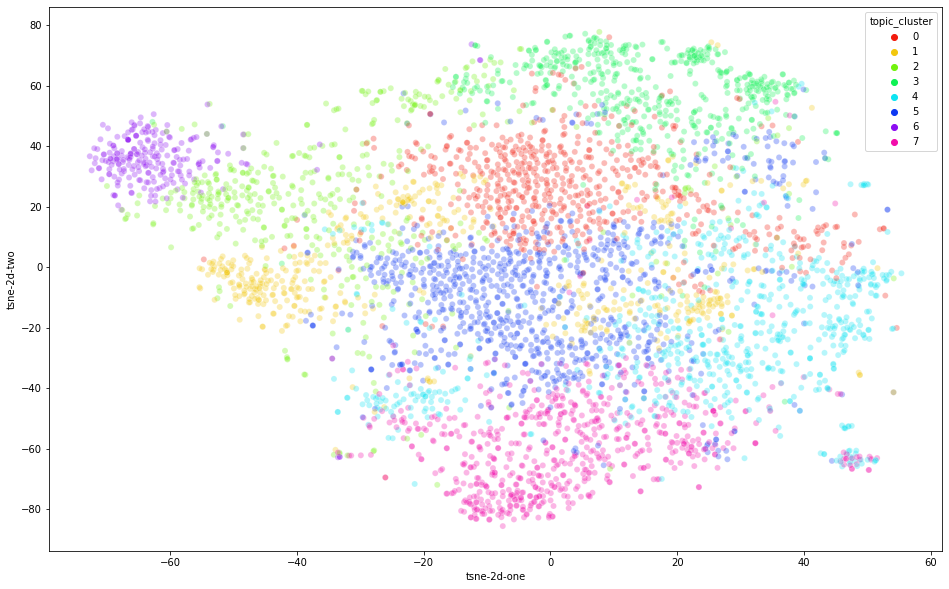

In [18]:
plot_tsne_2D(embeddings_list[0], clustering_results['Window_1'], 2000, 8)

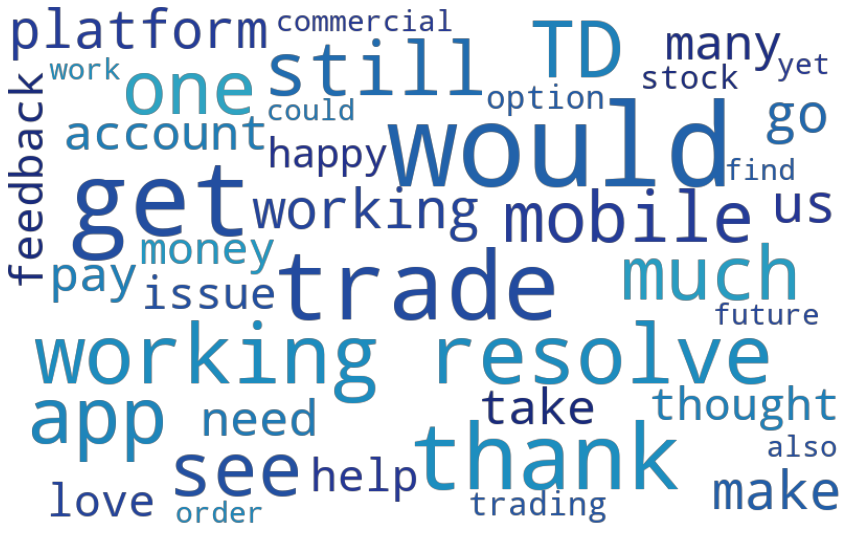

In [22]:
cluster = get_cluster(clustering_results['Window_1'], 2)
get_wordcloud(cluster, ('tweets'), new_cmap_2)

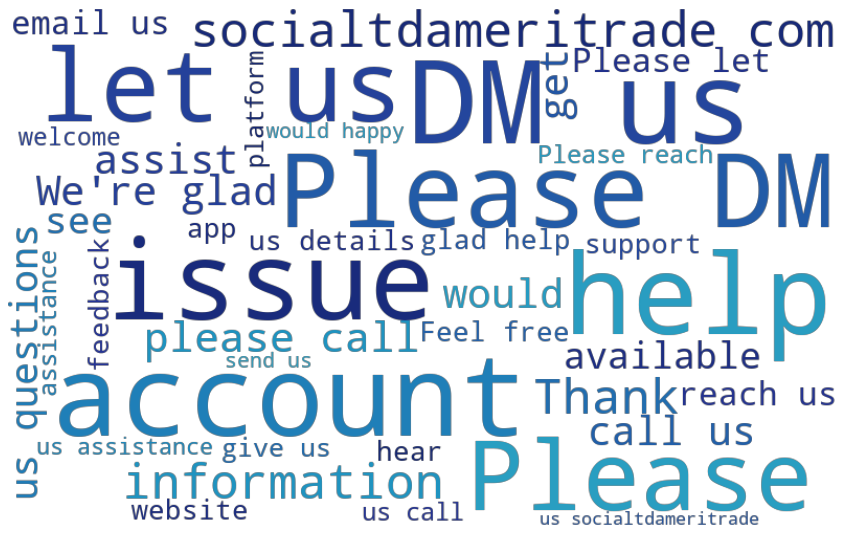

In [23]:
cluster = get_cluster(clustering_results['Window_1'], 3)
get_wordcloud(cluster, ('tweets'), new_cmap_2)

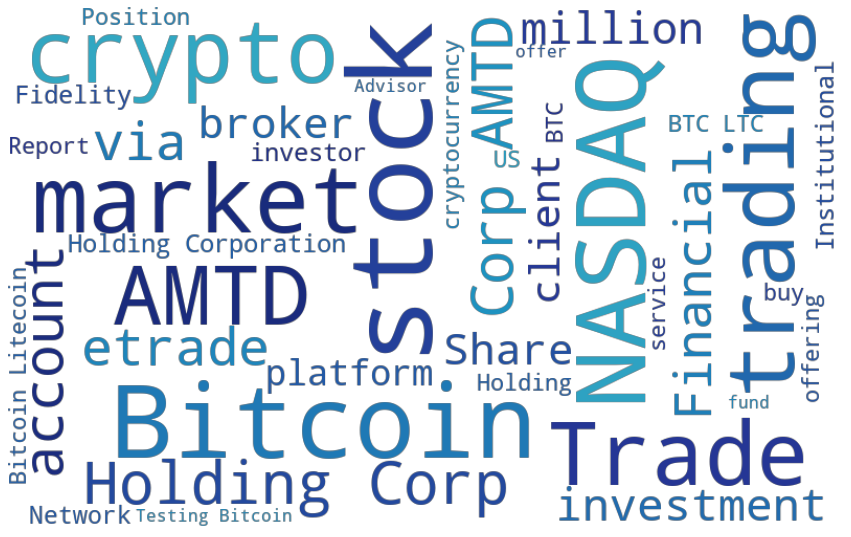

In [ ]:
cluster = get_cluster(clustering_results['Window_2'], 0)
get_wordcloud(cluster, ('tweets'), new_cmap_2)

# **3. Summarization**

In [ ]:
from summarization import*
from prepare_summarization import*


In [ ]:
a,b = get_cluster_summaries_BART('Vader', 'Custom', clustering_results['Window_2'], 8, 'tweets', 0.5, 20, 15, 35, 80, 3)

Time taken to classify 822 tweets : 0.16791129112243652 sec

Time taken to classify 578 tweets : 0.12270140647888184 sec

Time taken to classify 1136 tweets : 0.2722594738006592 sec

Time taken to classify 748 tweets : 0.1874399185180664 sec

Time taken to classify 296 tweets : 0.016020536422729492 sec

Time taken to classify 530 tweets : 0.05560469627380371 sec

Time taken to classify 499 tweets : 0.11491799354553223 sec



Token indices sequence length is longer than the specified maximum sequence length for this model (626 > 512). Running this sequence through the model will result in indexing errors


Time taken to classify 678 tweets : 0.1013033390045166 sec



# End-to-end analysis in one cell 

In [ ]:
# load the data
data = pd.read_csv('filteredTD.csv')

#get embeddings and tweets for each time window
df_list,embeddings_list = get_window_tweets_and_embeddings('BERT_base', 'BERT', data_truncated, 'processed_text', 'TD')

# clustering
clustering_results = {}
i = 1
for window_df, embeddings_df in zip(df_list,embeddings_list):
  key_name = f"Window_{i}"
  clustering_results[key_name] = Kmedoids_clustering(window_df, 'text', embeddings_df, 8, max_iter= 500)
  i+=1

df_list_2 =  [clustering_results[key] for key in clustering_results.keys()]
positive_summaries_allwindows, negative_summaries_allwindows = summarize('BART', df_list_2, 'Vader', 'Custom',  8, 'tweets', 0.3, 20, 15, 40, 80, 2)